### Read and evaluate the following problem statement: 
Determine which passengers will survive on the Titantic, using all avaliable data (age, passenger class, fare, ect...).



# Project 1
## You may have to do some clever google-searches, slack posting, and collaboration to find answers to these questions!!! (Post in Slack, talk with eachother, ask me for help!)

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

#### 1. What is the outcome? (Rather morbid, I realize this)

Answer: The outcome of this data set will determine which Titanic passengers were more likely to survive, based on various traits/characteristics (e.g. age, gender, etc.) that we know about them.

#### 2. What are the predictors/covariates? 

Answer: The predictors/covariates include:
- Ticket class (1st, 2nd, 3rd)
- Gender
- Age in years	
- The total number of siblings/spouses the passenger had aboard the Titanic	
- The total number of parents & children the passenger had aboard the Titanic	
- The passenger fare	
- Port of Embarkation (Cherbourg, Queenstown, Southampton)

We also know the passenger's name, ticket number, and cabin number, but those are unlikely to be predictors because they aren't related with variables such as class/port of embarkation, etc.

#### 3. What timeframe is this data relevent for?

Answer: The timeframe for this data is April 15, 1912, the day the Titanic sank. While it can be used to possibly help us understand other shipwrecks/travel disasters, it only includes data for this singular event. 

#### 4. What is the hypothesis?

Answer: In "plain English", my null hypotheses are:

- Gender is unrelated to survival rate on the Titanic.
- Age is unrelated to survival rate on the Titanic.
- Passenger class (a proxy for socioeconomic status) is unrelated to survival rate on the Titanic.
- Passenger fare (a proxy for SES) is unrelated to survival rate on the Titanic. 
- Port of embarkation is unrelated to survival rate on the Titanic.
- The number of siblings/spouses a passenger had aboard the Titanic is unrelated to survival rate. 
- The number of parents/children a paassenger had aboard the Titanic is unrelated to survival rate. 

## Let's get started with our dataset

In [44]:
# Lets look at our data so we can create a data dictionary

import pandas as pd
import numpy as np

file_path = '/Users/thshih/ds_class/data_sets/'

titanic_df = pd.read_csv(file_path + "titanic_train.csv")
test_df = pd.read_csv(file_path + "titanic_test.csv")

In [45]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### 1. Create a data dictionary 

We would like to explore the association between X and Y 

Answer: 

Outcome/Covariate | Variable | Description | Type of Variable
--- | ---| ---| ---
outcome | survival | 0 = No, 1 = Yes | categorial/discrete
neither | passengerid | id associated w/ passenger | categorial/discrete
covariate | pclass (Ticket class)| 	1 = 1st class, 2 = 2nd class, 3 = 3rd class | categorial/discrete 
covariate | sex	| male/female | categorial/discrete (though the "gender studies" voice in me is saying "gender is a spectrum and there aren't just 2 binary genders :)". But, given the existing data set, categorical/discrete)
covariate | Age	| Age in years | categorial/discrete (but only because it's in whole/half years - otherwise, it'd be continuous)
covariate | sibsp |	# of siblings / spouses on the Titanic | categorial/discrete
covariate | parch |	# of parents / children on the Titanic | categorial/discrete
neither | ticket | Ticket number | categorial/discrete
covariate | fare | Passenger fare | This one is tricky. In theory, there's a non countable, infinite number of values between 0.01 [units of money] and 0.02 [units of money]. In reality, because of how we conceputalize money/currency, there __is__ a discrete, countable number of values between each unit of money (e.g. if you think of the smallest unit of money, say a penny, we don't think of money in terms of fractions of the smallest unit of money). __But, but also__, money has no "limit" in terms of value we can count (e.g. in theory money can go on into infinity). Therefore, it's not truly "limited" in terms of its countable values, which is a key part of discrete/categorical variables. So, I'm going to say continuous (but continue to internally debate with myself).
neither | cabin |	Cabin number | categorial/discrete 	
covariate | embarked | Port of Embarkation | categorial/discrete


#### 2. What is the outcome?

Answer: The outcome is whether or not a passenger survives. We can look at the outcome in tandem with the different variables we have to understand how certain variables impacted/influenced survival rate on the Titanic. 

#### 3. What are the predictors/covariates? 

Answer: Based on the above data, the predictors/covariates include:
- Ticket class (1st, 2nd, 3rd)
- Gender
- Age in years	
- The total number of siblings/spouses the passenger had aboard the Titanic	
- The total number of parents & children the passenger had aboard the Titanic	
- The passenger fare	
- Port of Embarkation (Cherbourg, Queenstown, Southampton)

We also know the passenger's name, ticket number, and cabin number, but those are unlikely to be predictors because they aren't related with variables such as class/port of embarkation, etc.

#### 4. What timeframe is this data relevent for?

Answer: The timeframe for this data is April 15, 1912, the day the Titanic sank. While it can be used to possibly help us understand other shipwrecks/travel disasters, it only includes data for this singular event. 

#### 4. What is the hypothesis?

Answer: In "plain English", my null hypotheses are:

- Gender is unrelated to survival rate on the Titanic.
- Age is unrelated to survival rate on the Titanic.
- Passenger class (a proxy for socioeconomic status) is unrelated to survival rate on the Titanic.
- Passenger fare (a proxy for SES) is unrelated to survival rate on the Titanic. 
- Port of embarkation is unrelated to survival rate on the Titanic.
- The number of siblings/spouses a passenger had aboard the Titanic is unrelated to survival rate. 
- The number of parents/children a paassenger had aboard the Titanic is unrelated to survival rate. 

    Using the above information, write a well-formed problem statement. 


## Problem Statement

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: The goals of this exploratory analysis are:
- Explore what a "typical" passenger aboard the Titanic was like (e.g. what was the distribution of ages? How many men / women? What were the ranges of fares, etc.)
- Take a deeper dive, and look at what a "typical" passenger who survived vs. didn't survive was like (e.g. was there a higher prevalence of men vs. women who survived? How did age influence survival (both very young & very old)? What were survival rates like for different fares / passenger classes?
- Look at cross-sections of data. E.g. what do survival rates look like by age & gender? By gender & class? We want to be careful not to look at all the variables, or to think about "confounding" variables, but it's very possible that a variety of factors "tell the story" of who was most likely to survive. 
- Build models that will help us test our above hypotheses about what variables do/don't have an impact on survival rate. 

#### 2a. What are the assumptions of the distribution of data? 

Answer: Our assumption is that the data is "normally" distributed, which is especially important because we will be using the data set to calculate:
- averages / "measures of center"
- standard deviation
- confidence intervals
- interquartile range / "outliers"

In addition, since we are comparing the characteristics of people who did/did not survive, and we will be calculating metrics such as "measures of center" and outliers for survived & not survived populations, it also assumes that the populations of "survived" and "not survived" are also "normally" distributed.

#### 2b. How will determine the distribution of your data? 

Answer: There are a couple of ways I can determine the distribution of my data:

1) Use the ".describe()" function to get the mean, median, counts, and IQR values of each of the covariates I'm looking to analyze

2) Use histogram plots to get a visual representation of how distributed the data is 

In [47]:
# Use the describe function to get a "snapshot" view of distribution for key variables

titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [60]:
# For values that are null, replace them with the median and/or the most common values!
# The above describe tells us "median" values - but let's use the below to find out the most "common" port of Embarkation

titanic_df.groupby(['Embarked']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,69
Q,77,77,77,77,77,28,77,77,77,77,4
S,644,644,644,644,644,554,644,644,644,644,129


In [62]:
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S") # Replace all null Embarked with S, the most common value
titanic_df["Fare"].fillna(test_df["Fare"].median(), inplace=True) #Replace null Fare values with median
titanic_df["Age"].fillna(test_df["Age"].median(), inplace=True) #Replace null Age values with median

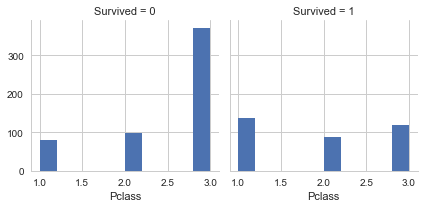

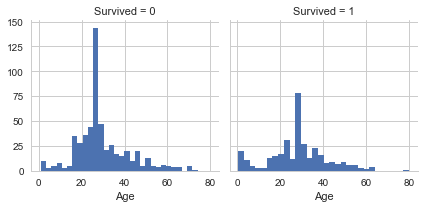

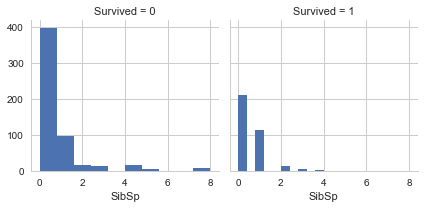

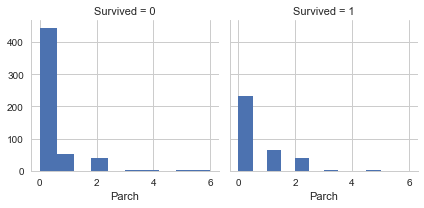

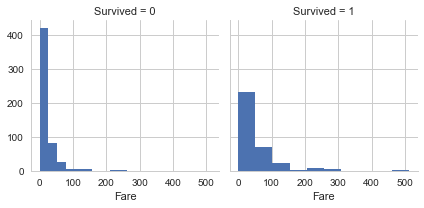

In [63]:
# Use plotting to look at distributions of covariates based on passengers that survived/didn't survive
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

pclass = sns.FacetGrid(titanic_df, col='Survived')
pclass.map(plt.hist, 'Pclass')

age = sns.FacetGrid(titanic_df, col='Survived')
age.map(plt.hist, 'Age', bins=30)

sibsp = sns.FacetGrid(titanic_df, col='Survived')
sibsp.map(plt.hist, 'SibSp')

parch = sns.FacetGrid(titanic_df, col='Survived')
parch.map(plt.hist, 'Parch')

fare = sns.FacetGrid(titanic_df, col='Survived')
fare.map(plt.hist, 'Fare', bins=10)

#### 3a. How might outliers impact your analysis? 

Answer: Outliers might positively or negatively skew my data, so that the mean value is either much higher or much lower than my median value. If I use the average as my "measure of center", this could cause me to think that a covariate, such as the age or fare, is actually might higher/lower than the median/middle value is, which could cause me to falsely represent and conclude which age/fare/family size, etc. was "most likely" to survive the Titanic sinking.

For example, based on the the above "describe" and "histogram", we can see that "max" fare is substantially higher than the median and the upper bound of the IQR. We can also see in the histogram that there is a very long "tail" to the right in terms of fares, while the concentration of fares appears to be < ~40. Therefore, the "mean" fare price (32.204208) is more than 2x the "median" fare price (14.454200). 

#### 3b. How will you test for outliers? 

Answer: There are 2 ways I can test for outliers:

1) Finding the IQR, and then adding/subtracting 1.5x the IQR range to the upper & lower bounds of the IQR

2) Find the "standard deviation", and find values +/- 3 standard deviations from the mean.

See below for my 2 methods! I'm going to find outliers for "Fare"


In [64]:
# Finding outliers for Fare - using IQR!

titanic_df.describe() #From here - we know that the IQR values for "Fare" is 7.910400 (25%) to 31.000000 (75%)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.162929,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.046587,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
fare_iqr = (31.000000 - 7.910400) * 1.5 # This will calculate the IQR
outlier_min = max(7.910400 - fare_iqr, 0) # This will calculate the "min" value for not being an outlier. Anything below this value is an "outlier". If the value is below 0, we will take 0, because you can't have "negative" fare.
outlier_max = 31.000000 + fare_iqr #This will calculate the "max" value for not being an outlier. Anything above this value is an outlier
outliers = titanic_df[(titanic_df['Fare'] > outlier_max) | (titanic_df['Fare'] < outlier_min)]['Fare'] #This will list all the passengers with Fares that are outliers

print fare_iqr
print outlier_min
print outlier_max
print outliers


34.6344
0
65.6344
1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
61      80.0000
62      83.4750
72      73.5000
88     263.0000
102     77.2875
118    247.5208
120     73.5000
124     77.2875
139     79.2000
151     66.6000
159     69.5500
180     69.5500
195    146.5208
201     69.5500
215    113.2750
218     76.2917
224     90.0000
230     83.4750
245     90.0000
256     79.2000
257     86.5000
258    512.3292
262     79.6500
268    153.4625
269    135.6333
         ...   
659    113.2750
660    133.6500
665     73.5000
679    512.3292
681     76.7292
689    211.3375
698    110.8833
700    227.5250
708    151.5500
716    227.5250
730    211.3375
737    512.3292
741     78.8500
742    262.3750
745     71.0000
759     86.5000
763    120.0000
765     77.9583
779    211.3375
789     79.2000
792     69.5500
802    120.0000
820     93.5000
829     80.0000
835     83.1583
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: 

In [66]:
# Here's how we can find outliers using the standard deviation!

fare_mean = titanic_df['Fare'].mean() #calculate the mean
fare_std = titanic_df['Fare'].std() #calculate the standard deviation
fare_outlier_threshold = fare_std * 3 # calculate 3x the standard deviation
fare_min_threshold = max(fare_mean - fare_outlier_threshold, 0) #this is the "min" threshold for not being an outlier. Anything below this value is an outlier. We "zero" it out, because we can't have "negative" fare.
fare_max_threshold = fare_mean + fare_outlier_threshold #this is the "max"threshold for not being an outlier. Anything above this value is an outlier
outliers = titanic_df[(titanic_df['Fare'] > fare_max_threshold) | (titanic_df['Fare'] < fare_min_threshold)]['Fare'] #This will list all the passengers with Fares that are outliers

print fare_mean
print fare_std
print fare_outlier_threshold
print fare_min_threshold
print fare_max_threshold
print outliers

#interesting observation! This methodology produces FAR fewer outliers than 1.5x the IQR! It's because this methodlogy is more susceptible to
#outliers skewing the analysis. The standard deviation here is large (larger than the mean even!) and so, the "max" threshold
# for what is considered and outlier (mean + 3x the std) is much higher, and thus, far fewer fares are considered "outliers"

32.2042079686
49.6934285972
149.080285792
0
181.28449376
27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: Fare, dtype: float64


#### 4a. What is colinearity? 

Answer: Collinearity is when there is a strong, linear relationship between two or more covariates/predictor variables. This can make it difficult to understand what the individual impact of a covariate is, and can lead us to "overfit" our data (i.e. add too many variables). It can also mean that our coefficients are not as accurate as they could be, or that we have error rates that are very high/erratic.

#### 4b. How will you test for colinearity? 

Answer: I can test for collinearity in a couple of different ways:

1) Run a correlation matrix to see if there are any covariates/independent variables that strongly correlate with each other

2) Test for "partial correlation" using Pearson's method

In [67]:
# Correlation matrix

titanic_df.corr()

# Based on this matrix, it doesn't look as though any 2 covariates have a very strong linear relationship with one another

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034759,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.061956,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.344489,0.083081,0.018443,-0.549500
Age,0.034759,-0.061956,-0.344489,1.000000,-0.233396,-0.168329,0.099571
SibSp,-0.057527,-0.035322,0.083081,-0.233396,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.168329,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.099571,0.159651,0.216225,1.000000


#### 5. What is your exploratory analysis plan?

Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: Hello future colleague! Here is an analysis plan & the methodology I used so that you can repeat this analysis in the future and get the same results.

1. Naviate to Kaggle's website & download the Titanic test & training set. Import both files into your Python program of choice (I've done this analysis in Jupyter - but you do you!)

2. Import your preferred Python packages. I personally used numpy, pandas, seaborn, and matplotlib, but there are tons of great packages out there!

3. Run a describe & some basic counts on your dataset, and replace any "null/NAN" covariates with either the mode or the median. I chose to replace any "numeric" values (e.g. fare, age) with the median, and "string" values (e.g. port of Embarkation) with the mode.

4. Create histograms for each of your covariates, pivoted by passengers that survived & didn't survive. This will allow you (along with your "describe" above) to get a sense of how "normally" distributed your data is, as this will be the basis of your model's future assumptions.

5. Test for outliers. I used 2 different methodologies - using 1.5 +/- the IQR, and going 3 standard deviations away from the mean. Calculate both to decide which is a "better" measurement for extreme values. A good indicator is how far apart your median & mean are - in the case where they are very far apart, this means that your standard deviation is more likely to be skewed, which can cause 3 standard deviations +/- the mean to give you too few or too many outlier values.

6. Check your co-variates for collinearity. You'll want to ensure that none of your variables are strongly correlated with each other, as this can cause all sorts of problems when you try and run regressions, and determine which independent variables most strongly influence your "outcome". There's a few methods you can use for this - a simple correlation matrix is a great start. You can also run "partial" correlation tests to see if your variable correlation is due to a 3rd variable.

7. Pick some different model methodologies, and test away! Ensure you document how you captured outliers, what you did with null values, and why you picked the co-variates you did. 

## Bonus Questions:

### 1. Articulate the assumptions and risks of your model / data set



Answer: There are definitely some risks/assumptions that are critical to take into account with any model you build from this data set:

1) For obvious reasons (it would be cruel to repeat, there aren't many massive ship wrecks throughout history, etc.), this isn't a very "robust" data set, and is only truly "representative" of this 1 event. While we can use this data set to predict what _might_ happen in a future ship wreck or disaster, it fails one of the core statistical principles, which is "with respect to repeated testing". While we can create models off of this data and do exploratory learnings, we have to be careful trying to extrapolate too much information from this data set, as there is relatively "little" data, and no concept of "time series" (i.e. how the influence of these covariates/independent variables might change over time). 

2) The data isn't normally distributed, especially when you break out the data by passengers who survived and didn't survive. This can make life more difficult, as everything from your mean to your standard deviation/how you calculate outliers can be skewed. In addition, given the relatively "small" data sample, a handful of outlier values can certainly have a significant influence on the data patterns we see.

3) Our data assumes factors such as class/Socioeconomic status based on fare, passenger class, and port of Embarkation, but these are only proxies. While these variables might be highly indicative of class, we are still making assumptions based on what historians & common knoweldge tell us about this time period (e.g. in the early 1900s, [some town] was wealthier, and in general, higher fares is related to a better passenger class, and generally indicative of wealth).

4) The data is over 100 years old, and there isn't really a concept of "test" and "control" groups. We could in theory look at other ship wrecks throughout history to gauge trends, but since no 2 disasters are the same, it is very difficult to isolate true impact. 